# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns


## **`Read Data`**

In [2]:
stats_df = pd.read_csv("/content/player_stats_2024_2025_season.csv")
info_df = pd.read_csv("/content/premier_player_info.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/player_stats_2024_2025_season.csv'

In [40]:
print(stats_df.columns)
print(info_df.columns)


Index(['player_name', 'Nationality', 'Preferred Foot', 'Date of Birth',
       'appearances_', 'sub_appearances', 'XA', 'pass_attempts',
       'pass_accuracy', 'long_pass_attempts', 'long_pass_accuracy',
       'Minutes Played', 'Duels Won', 'Total Tackles', 'Interceptions',
       'Blocks', 'Red Cards', 'Yellow Cards', 'XG',
       'Touches in the Opposition Box', 'Aerial Duels Won', 'Assists',
       'Shots On Target Inside the Box', 'cross_attempts', 'cross_accuracy',
       'dribble_attempts', 'dribble_accuracy', 'Fouls', 'Goals',
       'Hit Woodwork', 'Offsides', 'Shots On Target Outside the Box',
       'Corners Taken', 'Appearances', 'free_kick_attempts',
       'free_kicks_scored', 'Passes', 'Own Goals', 'Penalties Taken',
       'Goals Conceded', 'Clean Sheets', 'Saves Made', 'Penalties Faced',
       'penalty_attempts', 'penalties_scored', 'penalties_saved',
       'penalty_save_precentage'],
      dtype='object')
Index(['player_image_url', 'player_name', 'player_country', 

# **Merge Tables**

In [41]:
merged_df = pd.merge(stats_df, info_df, on="player_name", how="inner")

In [42]:
merged_df.head()


,player_name,Nationality,Preferred Foot,Date of Birth,appearances_,sub_appearances,XA,pass_attempts,pass_accuracy,long_pass_attempts,...,Penalties Faced,penalty_attempts,penalties_scored,penalties_saved,penalty_save_precentage,player_image_url,player_country,player_club,player_position,player_stats_url
0,Max Aarons,England,Right,04/01/2000,3,2,0.02,51,80,5,...,0,0,0,0,0,https://resources.premierleague.com/premierlea...,England,Bournemouth,Defender,https://www.premierleague.com/en/players/23298...
1,George Abbott,England,Right,17/08/2005,0,0,0.00,0,0,0,...,0,0,0,0,0,https://resources.premierleague.com/premierlea...,England,Tottenham Hotspur,Midfielder,https://www.premierleague.com/en/players/51932...
2,Zach Abbott,England,Right,13/05/2006,0,0,0.00,0,0,0,...,0,0,0,0,0,https://resources.premierleague.com/premierlea...,England,Nottingham Forest,Defender,https://www.premierleague.com/en/players/54906...
3,Josh Acheampong,England,Right,05/05/2006,4,2,0.02,123,84,14,...,0,0,0,0,0,https://resources.premierleague.com/premierlea...,England,Chelsea,Defender,https://www.premierleague.com/en/players/57701...
4,Ché Adams,England,NaN,13/07/1996,0,0,0.00,0,0,0,...,0,0,0,0,0,https://resources.premierleague.com/premierlea...,Scotland,Southampton,Forward,https://www.premierleague.com/en/players/20043...


# **Pre_Processing**

In [6]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      1116 non-null   object 
 1   Nationality                      1114 non-null   object 
 2   Preferred Foot                   1001 non-null   object 
 3   Date of Birth                    1114 non-null   object 
 4   appearances_                     1116 non-null   int64  
 5   sub_appearances                  1116 non-null   int64  
 6   XA                               1116 non-null   float64
 7   pass_attempts                    1116 non-null   int64  
 8   pass_accuracy                    1116 non-null   int64  
 9   long_pass_attempts               1116 non-null   int64  
 10  long_pass_accuracy               1116 non-null   int64  
 11  Minutes Played                   1116 non-null   int64  
 12  Duels Won           

,appearances_,sub_appearances,XA,pass_attempts,pass_accuracy,long_pass_attempts,long_pass_accuracy,Minutes Played,Duels Won,Total Tackles,...,Own Goals,Penalties Taken,Goals Conceded,Clean Sheets,Saves Made,Penalties Faced,penalty_attempts,penalties_scored,penalties_saved,penalty_save_precentage
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,8.254480,2.792115,0.613154,296.318100,38.168459,31.282258,20.120072,593.068996,32.183692,11.602151,...,0.027778,0.006272,0.999104,0.156810,2.095878,0.074373,0.066308,0.060036,0.012545,0.450717
std,12.328745,4.781482,1.338665,493.536369,40.909309,80.926973,25.526771,954.107362,53.348094,20.853135,...,0.194404,0.089623,6.229756,1.125154,13.368081,0.556113,0.517924,0.483798,0.133341,5.292375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,4.000000,0.542500,426.250000,82.000000,25.000000,44.000000,961.750000,48.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,28.000000,9.260000,2922.000000,95.000000,886.000000,88.000000,3420.000000,243.000000,133.000000,...,3.000000,2.000000,66.000000,13.000000,153.000000,9.000000,9.000000,9.000000,2.000000,100.000000


In [7]:
merged_df.isnull().sum()


,0
player_name,0
Nationality,2
Preferred Foot,115
Date of Birth,2
appearances_,0
sub_appearances,0
XA,0
pass_attempts,0
pass_accuracy,0
long_pass_attempts,0


In [43]:
merged_df["Preferred Foot"] = merged_df.groupby("player_position")["Preferred Foot"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Right"))


In [44]:
merged_df.isna().sum()

,0
player_name,0
Nationality,2
Preferred Foot,0
Date of Birth,2
appearances_,0
sub_appearances,0
XA,0
pass_attempts,0
pass_accuracy,0
long_pass_attempts,0


In [45]:
merged_df["Nationality"] = merged_df.groupby("player_club")["Nationality"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))


In [46]:
merged_df = merged_df.dropna(subset=["Date of Birth"])

In [47]:
merged_df["Date of Birth"] = pd.to_datetime(merged_df["Date of Birth"], dayfirst=True, errors="coerce")

# Calculate age as of 30/08/2025
merged_df["Age"] = (pd.to_datetime("30/08/2025") - merged_df["Date of Birth"]).dt.days // 365

# Optional: Check for any remaining NaNs in the Age column
print(merged_df["Age"].isna().sum())

0


/tmp/ipython-input-2471148318.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df["Age"] = (pd.to_datetime("30/08/2025") - merged_df["Date of Birth"]).dt.days // 365


In [48]:

print(merged_df["Date of Birth"].isna().sum())


0


In [49]:
merged_df.isna().sum()

,0
player_name,0
Nationality,0
Preferred Foot,0
Date of Birth,0
appearances_,0
sub_appearances,0
XA,0
pass_attempts,0
pass_accuracy,0
long_pass_attempts,0


In [50]:
merged_df.head(5)

,player_name,Nationality,Preferred Foot,Date of Birth,appearances_,sub_appearances,XA,pass_attempts,pass_accuracy,long_pass_attempts,...,penalty_attempts,penalties_scored,penalties_saved,penalty_save_precentage,player_image_url,player_country,player_club,player_position,player_stats_url,Age
0,Max Aarons,England,Right,2000-01-04,3,2,0.02,51,80,5,...,0,0,0,0,https://resources.premierleague.com/premierlea...,England,Bournemouth,Defender,https://www.premierleague.com/en/players/23298...,25
1,George Abbott,England,Right,2005-08-17,0,0,0.00,0,0,0,...,0,0,0,0,https://resources.premierleague.com/premierlea...,England,Tottenham Hotspur,Midfielder,https://www.premierleague.com/en/players/51932...,20
2,Zach Abbott,England,Right,2006-05-13,0,0,0.00,0,0,0,...,0,0,0,0,https://resources.premierleague.com/premierlea...,England,Nottingham Forest,Defender,https://www.premierleague.com/en/players/54906...,19
3,Josh Acheampong,England,Right,2006-05-05,4,2,0.02,123,84,14,...,0,0,0,0,https://resources.premierleague.com/premierlea...,England,Chelsea,Defender,https://www.premierleague.com/en/players/57701...,19
4,Ché Adams,England,Right,1996-07-13,0,0,0.00,0,0,0,...,0,0,0,0,https://resources.premierleague.com/premierlea...,Scotland,Southampton,Forward,https://www.premierleague.com/en/players/20043...,29


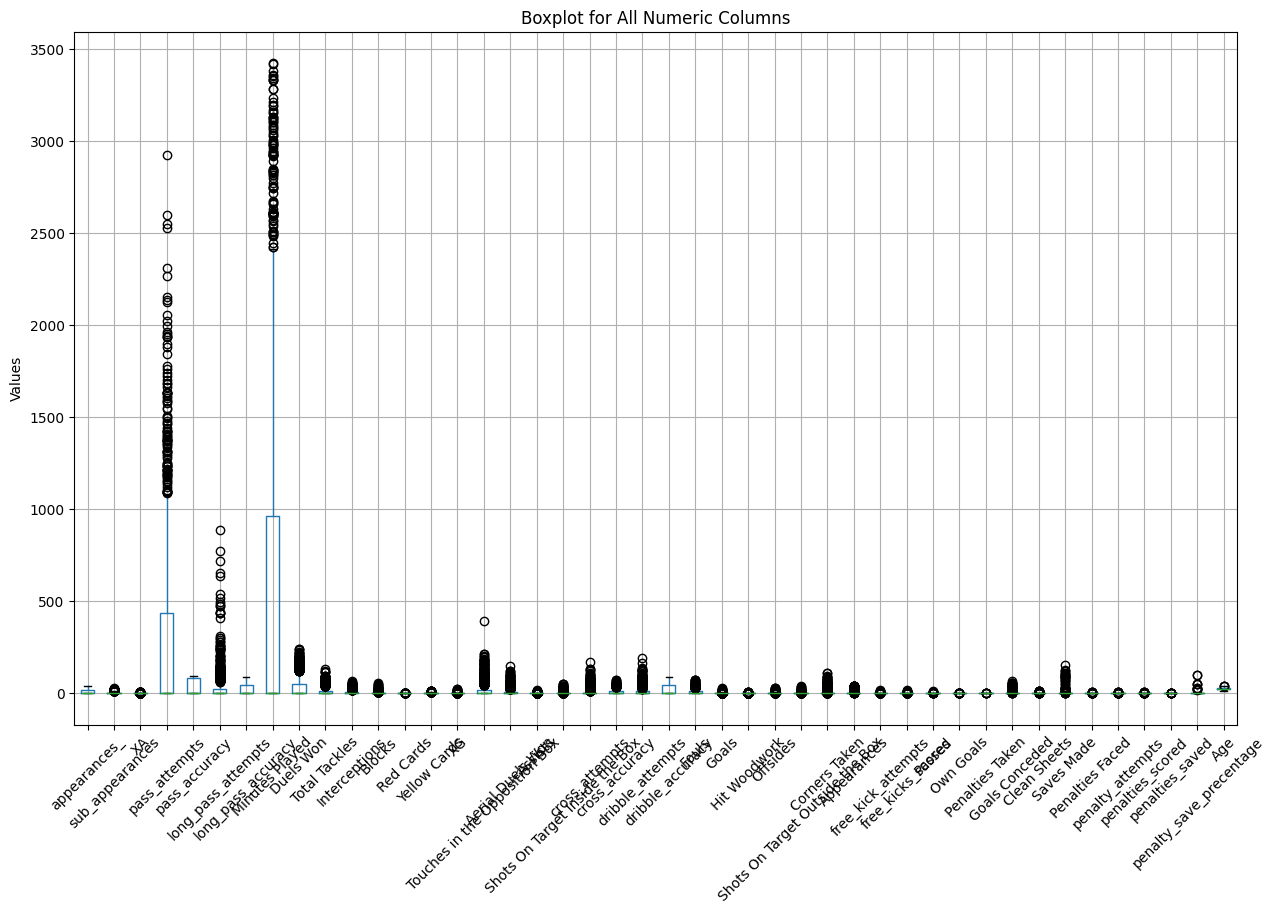

In [ ]:
numeric_cols = merged_df.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(15,9))
numeric_cols.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for All Numeric Columns")
plt.ylabel("Values")
plt.show()

# **Data is ready now to analyzing it** ,
# **Lets go to Discover it**

In [ ]:
# النادي الأكثر تمثيلاً
best_club_by_count = merged_df['player_club'].value_counts().head(1)

print("النادي الأكثر تمثيلاً:")
print(best_club_by_count)

# متوسط الـ appearances لكل نادي (كمقياس لقوة اللاعبين في النادي)
best_club_by_appearances = merged_df.groupby('player_club')['appearances_'].mean().sort_values(ascending=False).head(5)

print("\nأعلى 5 أندية في متوسط المشاركات:")
print(best_club_by_appearances)


النادي الأكثر تمثيلاً:
player_club
Chelsea    75
Name: count, dtype: int64

أعلى 5 أندية في متوسط المشاركات:
player_club
Fulham             12.951220
West Ham United    11.413043
Ipswich Town       10.420000
Bournemouth         9.882353
Southampton         9.725490
Name: appearances_, dtype: float64


In [ ]:
# متوسط المشاركات حسب المركز
avg_appearances_by_position = merged_df.groupby('player_position')['appearances_'].mean().sort_values(ascending=False)

print("متوسط المشاركات حسب المركز:")
print(avg_appearances_by_position)


متوسط المشاركات حسب المركز:
player_position
Forward       10.284047
Midfielder    10.179558
Defender       7.771350
Goalkeeper     0.477273
Name: appearances_, dtype: float64


In [ ]:
# عدد اللاعبين في كل نادي (Top 10)
players_per_club = merged_df['player_club'].value_counts().head(10)

print("أعلى 10 أندية من حيث عدد اللاعبين:")
print(players_per_club)

# عدد اللاعبين حسب الجنسية
players_per_country = merged_df['Nationality'].value_counts().head(10)

print("\nأكثر 10 جنسيات تمثيلاً:")
print(players_per_country)


أعلى 10 أندية من حيث عدد اللاعبين:
player_club
Chelsea                     75
Manchester United           69
Brighton and Hove Albion    67
Tottenham Hotspur           61
Newcastle United            58
Aston Villa                 58
Manchester City             58
Wolverhampton Wanderers     58
Brentford                   57
Liverpool                   55
Name: count, dtype: int64

أكثر 10 جنسيات تمثيلاً:
Nationality
England        466
Brazil          47
Ireland         44
France          42
Netherlands     34
Portugal        33
Spain           31
Wales           30
Scotland        28
Denmark         24
Name: count, dtype: int64


In [ ]:
# تحويل تاريخ الميلاد إلى عمر
merged_df['Date of Birth'] = pd.to_datetime(merged_df['Date of Birth'], errors='coerce')
today = pd.Timestamp.today()
merged_df['Age'] = (today - merged_df['Date of Birth']).dt.days // 365

# تقسيم اللاعبين حسب العمر
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=[15, 23, 29, 35, 45],
                         labels=['Young (<23)', 'Prime (23-29)', 'Experienced (30-35)', 'Veteran (35+)'])

# متوسط المشاركات لكل فئة عمرية
avg_appearances_by_age = merged_df.groupby('Age_Group')['appearances_'].sum()

print("متوسط المشاركات حسب الفئات العمرية:")
print(avg_appearances_by_age)

# عدد اللاعبين في كل فئة
count_by_age = merged_df['Age_Group'].value_counts()

print("\nعدد اللاعبين في كل فئة عمرية:")
print(count_by_age)


متوسط المشاركات حسب الفئات العمرية:
Age_Group
Young (<23)            1111
Prime (23-29)          1731
Experienced (30-35)     775
Veteran (35+)            72
Name: appearances_, dtype: int64

عدد اللاعبين في كل فئة عمرية:
Age_Group
Young (<23)            230
Prime (23-29)          146
Experienced (30-35)     63
Veteran (35+)           13
Name: count, dtype: int64


/tmp/ipython-input-844598625.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_appearances_by_age = merged_df.groupby('Age_Group')['appearances_'].sum()


In [ ]:
top_pass_accuracy = merged_df.sort_values(by="pass_accuracy", ascending=False)[
    ["player_name", "player_club", "player_position", "pass_accuracy"]
].head(5)

print("🔹 أعلى 5 لاعيبة في دقة التمريرات:")
print(top_pass_accuracy)
# --- السؤال 4: أعلى Expected Assists (XA) ---
top_xa = merged_df.sort_values(by="XA", ascending=False)[
    ["player_name", "player_club", "player_position", "XA"]
].head(5)

print("\n🔹 أعلى 5 لاعيبة في XA (صناعة الفرص):")
print(top_xa)

🔹 أعلى 5 لاعيبة في دقة التمريرات:
           player_name        player_club player_position  pass_accuracy
873     William Saliba            Arsenal        Defender             95
1101        Rúben Dias    Manchester City        Defender             94
439              Rodri    Manchester City      Midfielder             94
306        Wataru Endo          Liverpool      Midfielder             94
273   Alfie Dorrington  Tottenham Hotspur        Defender             94

🔹 أعلى 5 لاعيبة في XA (صناعة الفرص):
         player_name        player_club player_position    XA
642     Bryan Mbeumo          Brentford      Midfielder  9.26
786      Cole Palmer            Chelsea      Midfielder  9.14
872    Mohamed Salah          Liverpool         Forward  9.06
130  Bruno Fernandes  Manchester United      Midfielder  7.98
871      Bukayo Saka            Arsenal         Forward  7.80


In [ ]:

best_players_by_team = merged_df.groupby(["player_club", "player_position"]).apply(
    lambda x: x.sort_values(by=["Minutes Played", "Goals", "Assists"], ascending=False).head(1)
)

best_players_by_team[["player_club", "player_position", "player_name", "Minutes Played", "Goals", "Assists"]]


/tmp/ipython-input-3729758408.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_players_by_team = merged_df.groupby(["player_club", "player_position"]).apply(


player_club  \
player_club             player_position                                 
Arsenal                 Defender        873                   Arsenal   
                        Forward         1003                  Arsenal   
                        Goalkeeper      431                   Arsenal   
                        Midfielder      841                   Arsenal   
Aston Villa             Defender        545               Aston Villa   
...                                                               ...   
West Ham United         Midfielder      556           West Ham United   
Wolverhampton Wanderers Defender        74    Wolverhampton Wanderers   
                        Forward         884   Wolverhampton Wanderers   
                        Goalkeeper      108   Wolverhampton Wanderers   
                        Midfielder      375   Wolverhampton Wanderers   

                                             player_position  \
player_club             player_position                        
Arsenal                 Defender        873         Defender   
                        Forward         1003         Forward   
                        Goalkeeper      431       Goalkeeper   
                        Midfielder      841       Midfielder   
Aston Villa             Defender        545         Defender   
...                                                      ...   
West Ham United         Midfielder      556       Midfielder   
Wolverhampton Wanderers Defender        74          Defender   
                        Forward         884          Forward   
                        Goalkeeper      108       Goalkeeper   
                        Midfielder      375       Midfielder   

                                                   player_name  \
player_club             player_position                          
Arsenal                 Defender        873     William Saliba   
                        Forward         1003  Leandro Trossard   
                        Goalkeeper      431          Karl Hein   
                        Midfielder      841        Declan Rice   
Aston Villa             Defender        545         Ezri Konsa   
...                                                        ...   
West Ham United         Midfielder      556     Mohammed Kudus   
Wolverhampton Wanderers Defender        74     Rayan Aït-Nouri   
                        Forward         884      Matheus Cunha   
                        Goalkeeper      108     Lewys Benjamin   
                        Midfielder      375         João Gomes   

                                              Minutes Played  Goals  Assists  
player_club             player_position                                       
Arsenal                 Defender        873             3041      2        0  
                        Forward         1003            2550      8        7  
                        Goalkeeper      431                0      0        0  
                        Midfielder      841             2833      4        7  
Aston Villa             Defender        545             2937      2        0  
...                                                      ...    ...      ...  
West Ham United         Midfielder      556             2601      5        3  
Wolverhampton Wanderers Defender        74              3127      4        7  
                        Forward         884             2600     15        6  
                        Goalkeeper      108                0      0        0  
                        Midfielder      375             2987      3        1  

[80 rows x 6 columns]

In [ ]:

merged_df["Playmaker_Score"] = merged_df["XA"] + merged_df["Assists"] + (merged_df["pass_accuracy"]/100)

top_playmakers = merged_df.sort_values(by="Playmaker_Score", ascending=False).head(10)
top_playmakers[["player_name", "player_club", "player_position", "Playmaker_Score"]]


,player_name,player_club,player_position,Playmaker_Score
872,Mohamed Salah,Liverpool,Forward,27.80
707,Jacob Murphy,Newcastle United,Midfielder,18.90
130,Bruno Fernandes,Manchester United,Midfielder,18.80
871,Bukayo Saka,Arsenal,Forward,18.64
786,Cole Palmer,Chelsea,Midfielder,17.97
234,Mikkel Damsgaard,Brentford,Midfielder,17.77
642,Bryan Mbeumo,Brentford,Midfielder,17.00
298,Anthony Elanga,Nottingham Forest,Forward,16.89
859,Morgan Rogers,Aston Villa,Forward,15.99
1114,Martin Ødegaard,Arsenal,Midfielder,15.53


In [ ]:

merged_df["Striker_Score"] = merged_df["Goals"] + merged_df["Assists"] + merged_df["XG"]

top_strikers = merged_df[merged_df["player_position"]=="Forward"].sort_values(by="Striker_Score", ascending=False).head(10)
top_strikers[["player_name", "player_club", "Striker_Score"]]


,player_name,player_club,Striker_Score
872,Mohamed Salah,Liverpool,72.37
479,Alexander Isak,Newcastle United,49.42
407,Erling Haaland,Manchester City,47.01
1037,Ollie Watkins,Aston Villa,39.38
1070,Chris Wood,Nottingham Forest,36.35
286,Luis Díaz,Liverpool,30.02
135,Jarrod Bowen,West Ham United,29.65
884,Matheus Cunha,Wolverhampton Wanderers,29.63
627,Jean-Philippe Mateta,Crystal Palace,29.53
951,Jørgen Strand Larsen,Wolverhampton Wanderers,28.27


In [ ]:
merged_df["player_position"].unique()


array(['Defender', 'Midfielder', 'Forward', 'Goalkeeper'], dtype=object)

In [ ]:
# أقوى مدافع
merged_df["Defender_Score"] = merged_df["Duels Won"] + merged_df["Total Tackles"] + merged_df["Clean Sheets"]

top_defenders = merged_df[merged_df["player_position"]=="Defender"].sort_values(by="Defender_Score", ascending=False).head(10)
top_defenders[["player_name", "player_club", "Defender_Score"]]


,player_name,player_club,Defender_Score
713,Daniel Muñoz,Crystal Palace,344
638,Noussair Mazraoui,Manchester United,331
74,Rayan Aït-Nouri,Wolverhampton Wanderers,309
848,Antonee Robinson,Fulham,298
1053,Neco Williams,Nottingham Forest,281
968,James Tarkowski,Everton,263
1032,Aaron Wan-Bissaka,West Ham United,253
675,Tyrick Mitchell,Crystal Palace,243
160,Dan Burn,Newcastle United,239
748,Dara O'Shea,Ipswich Town,239


In [ ]:
# أحسن حارس
merged_df["GK_Score"] = merged_df["Saves Made"] + merged_df["penalties_saved"] + merged_df["Clean Sheets"]

top_gks = merged_df[merged_df["player_position"]=="Goalkeeper"].sort_values(by="GK_Score", ascending=False).head(10)
top_gks[["player_name", "player_club", "GK_Score"]]


,player_name,player_club,GK_Score
330,Mark Flekken,Brentford,160
808,Jordan Pickford,Everton,136
902,Matz Sels,Nottingham Forest,133
827,Aaron Ramsdale,Southampton,130
576,Bernd Leno,Fulham,116
432,Dean Henderson,Crystal Palace,116
624,Emiliano Martínez,Aston Villa,109
964,Robert Sánchez,Chelsea,106
437,Mads Hermansen,Leicester City,105
64,Kepa,Bournemouth,105


In [ ]:
# اختيار أفضل تشكيل 2-4-4
best_gk = top_gks.head(2)
best_def = top_defenders.head(6)
best_mid = top_playmakers.head(4)
best_fwd = top_strikers.head(3)


best_442 = pd.concat([best_gk, best_def, best_mid, best_fwd])

# حذف التكرار لو لاعب متكرر
best_442 = best_442.drop_duplicates(subset="player_name")

# لو لسه العدد مش 11 لاعب، ممكن نجيب اللاعب التالي في القائمة لتعويض
while len(best_442) < 11:
    extra_player = merged_df[~merged_df["player_name"].isin(best_442["player_name"])].head(1)
    best_442 = pd.concat([best_442, extra_player])

best_442 = best_442[["player_name", "player_club", "player_position"]]
print(best_442)


            player_name              player_club player_position
330        Mark Flekken                Brentford      Goalkeeper
808     Jordan Pickford                  Everton      Goalkeeper
713        Daniel Muñoz           Crystal Palace        Defender
638   Noussair Mazraoui        Manchester United        Defender
74      Rayan Aït-Nouri  Wolverhampton Wanderers        Defender
848    Antonee Robinson                   Fulham        Defender
1053      Neco Williams        Nottingham Forest        Defender
968     James Tarkowski                  Everton        Defender
872       Mohamed Salah                Liverpool         Forward
707        Jacob Murphy         Newcastle United      Midfielder
130     Bruno Fernandes        Manchester United      Midfielder
871         Bukayo Saka                  Arsenal         Forward
479      Alexander Isak         Newcastle United         Forward
407      Erling Haaland          Manchester City         Forward


# **Build Model**

**PREPARE DATA AND SPLIT IT**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ------------------------------
# 2) Encoding لكل الأعمدة الـ Categorical
# ------------------------------
categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist()

encoder = LabelEncoder()
for col in categorical_cols:
    merged_df[col] = encoder.fit_transform(merged_df[col].astype(str))

# ------------------------------
# 3) Feature Selection
# ------------------------------
features = merged_df.drop(columns=['player_name'])   # استبعد اسم اللاعب

corr = merged_df.corr(numeric_only=True)


high_corr_features = corr['appearances_'][corr['appearances_'].abs() > 0.7].index.tolist()

print("📌 الأعمدة المرتبطة بشدة مع appearances_:", high_corr_features)


X = merged_df.drop(columns=high_corr_features)  # استبعدهم
y = merged_df['appearances_']


datetime_cols = X.select_dtypes(include=["datetime64[ns]"]).columns
print("⏰ Found datetime columns:", datetime_cols)
X = X.drop(columns=datetime_cols)

# 4) Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 5) Split Train/Test

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Data Ready: Cleaned, Encoded, Scaled, and Split")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


📌 الأعمدة المرتبطة بشدة مع appearances_: ['appearances_', 'pass_accuracy', 'long_pass_accuracy', 'Minutes Played', 'Duels Won', 'dribble_accuracy', 'Fouls']
⏰ Found datetime columns: Index(['Date of Birth'], dtype='object')
✅ Data Ready: Cleaned, Encoded, Scaled, and Split
X_train shape: (891, 45)
X_test shape: (223, 45)


In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
# XGBoost
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:

corr = merged_df.corr(numeric_only=True)

print("📊 Correlation with appearances_:")
print(corr['appearances_'].sort_values(ascending=False))

print(" الأعمدة المستبعدة (كورليشن عالي مع appearances_):")
print(high_corr_features)

used_features = [col for col in merged_df.columns if col not in high_corr_features and col != 'appearances_']

print("\n✅ الأعمدة المستخدمة في التدريب:")
print(used_features)

📊 Correlation with appearances_:
appearances_                       1.000000
Minutes Played                     0.768960
Duels Won                          0.752220
long_pass_accuracy                 0.739489
Fouls                              0.730756
dribble_accuracy                   0.723545
pass_accuracy                      0.719972
Total Tackles                      0.697325
sub_appearances                    0.687535
Yellow Cards                       0.655684
XA                                 0.638391
pass_attempts                      0.638051
dribble_attempts                   0.637870
Touches in the Opposition Box      0.621722
Interceptions                      0.592598
cross_accuracy                     0.587286
cross_attempts                     0.575126
Shots On Target Outside the Box    0.565698
Shots On Target Inside the Box     0.563809
Assists                            0.544491
XG                                 0.519628
Offsides                           0.494334

In [ ]:
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Performance:")
    print(f"MAE  = {mae:.2f}")
    print(f"RMSE = {rmse:.2f}")
    print(f"R²   = {r2:.2f}")

# ------------------------------
# 9) Results
# ------------------------------
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_xgb, "XGBoost")


📊 Random Forest Performance:
MAE  = 1.08
RMSE = 2.42
R²   = 0.96

📊 XGBoost Performance:
MAE  = 1.09
RMSE = 2.33
R²   = 0.96


In [ ]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.6 MB/s eta 0:00:00


In [65]:
!pip install streamlit colabcode


Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
INFO: pip is looking at multiple versions of colabcode to determine which version is compatible with other requirements. This could take a while.
  Using cached uvicorn-0.13.1-py3-none-any.whl.metadata (4.6 kB)
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this versio

In [ ]:

%%writefile app.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import streamlit as st

# --- Load Data ---
df = pd.read_csv("/content/final_leg_data.csv")
# Filter players by position and minutes
df_forwards = df[(df['player_position'] == 'Forward') & (df['Minutes Played'] > 100)]
df_midfielders = df[(df['player_position'] == 'Midfielder') & (df['Minutes Played'] > 100)]
df_defenders = df[(df['player_position'] == 'Defender') & (df['Minutes Played'] > 100)]
df_goalkeepers = df[df['player_position'] == 'Goalkeeper']


# --- Targets لكل مركز ---
targets_by_position = {
    'Forward': ['Goals', 'Yellow Cards', 'Red Cards', 'Penalties Taken'],
    'Midfielder': ['Goals', 'Assists', 'Yellow Cards', 'Red Cards'],
    'Defender': ['Goals', 'Yellow Cards', 'Red Cards', 'Own Goals'],
    'Goalkeeper': ['Clean Sheets', 'Goals Conceded', 'Yellow Cards', 'Red Cards']
}

# --- Features مشتركة لكل المراكز ---
features = ['Age', 'Minutes Played', 'XG', 'Shots On Target Inside the Box',
            'dribble_accuracy', 'cross_accuracy', 'Touches in the Opposition Box']

# --- Streamlit App ---
st.title("⚽ Player Performance Predictor")

# اختيار المركز
position = st.selectbox("اختر المركز:", list(targets_by_position.keys()), key="position_select")

# اختيار DataFrame حسب المركز
if position == "Forward":
    df_selected = df_forwards
elif position == "Midfielder":
    df_selected = df_midfielders
elif position == "Defender":
    df_selected = df_defenders
else:
    df_selected = df_goalkeepers

# اختيار اللاعب
player_name = st.selectbox("اختر اللاعب:", df_selected['player_name'].unique(), key="player_select")

# Features & Targets
X = df_selected[features].fillna(0)
y = df_selected[targets_by_position[position]].fillna(0)

# Train Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# زر التوقع
if st.button("🔮 Predict"):
    player_data = df_selected[df_selected['player_name'] == player_name][features]
    prediction = model.predict(player_data)[0]

    st.success(f"✅ Predictions for {player_name}:")
    for target, value in zip(targets_by_position[position], prediction):
        st.write(f"- {target}: {value:.2f}")

Overwriting app.py


In [ ]:

from pyngrok import ngrok
import subprocess

# نفتح نفق على بورت 8501
public_url = ngrok.connect(8501)
print("🔗 Streamlit URL:", public_url)

# نشغل streamlit
subprocess.run(["streamlit", "run", "app.py", "--server.port", "8501"])


🔗 Streamlit URL: NgrokTunnel: "https://4dd723dc4444.ngrok-free.app" -> "http://localhost:8501"
